<a href="https://colab.research.google.com/github/AmruthaA27/Task-13--KNN-Algorithm/blob/main/ML_Glass_KNN_Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#trainKNN.txt & testKNN.txt

**Importing the libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

**Importing the dataset**

In [2]:
df_train = pd.read_csv('trainKNN.txt',sep = ',',header = None,names=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'])
df_test = pd.read_csv('testKNN.txt',sep = ',',header = None,names=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'])
#df_train.head(5)
#df_test.head(5)

In [3]:
x_train = df_train[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
y_train = df_train[['Type of glass']]
x_test = df_test[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
y_test = df_test[['Type of glass']]

**Feature Scaling**

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaler.fit(x_test)


StandardScaler()

**Fitting K-NN to the Training set**

In [5]:
from sklearn.neighbors import KNeighborsClassifier
#Euclidean distance
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [26]:
#Euclidean distance
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(2,11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k,p=2)
    knn.fit(x_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

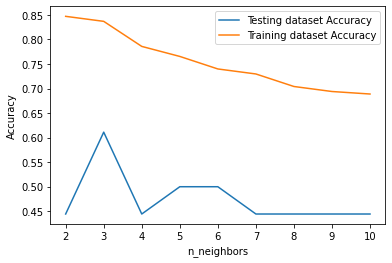

In [27]:
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

For Training set: Highest accuracy is 0.85 at k=2
For test set: Highest accuracy is 0.625 at k=3
Difference between accuracy of train and test is least is at k=3

**Making the Confusion Matrix(choosing the k=3 as the accuracy of both training and test data is highest there)**

In [33]:
from sklearn import metrics
knn3 = KNeighborsClassifier(n_neighbors=3,p=2)
knn_model.fit(x_train,y_train)
knn_predict = knn_model.predict(x_test)
print(knn_predict)
#print(y_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,knn_predict))

confusion_matrix = metrics.confusion_matrix(y_test,knn_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['1','2','3','5','6','7'])


[1 1 1 2 1 1 3 3 1 5 2 5 2 2 7 7 7 7]
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.25      0.33      0.29         3
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         3
           7       0.75      1.00      0.86         3

    accuracy                           0.61        18
   macro avg       0.58      0.61      0.57        18
weighted avg       0.58      0.61      0.57        18



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

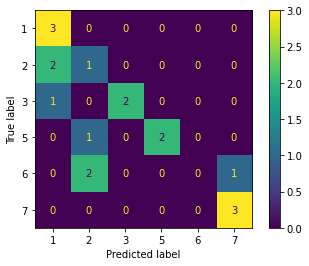

In [17]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [20]:
Accuracy = (3+1+2+2+3)/18
print(Accuracy)
Error_rate = 1 - Accuracy  
print(round(Error_rate,3))

0.6111111111111112
0.389


The accuracy of prediction with this model is approximately 75%.

In [ ]:
#Manhattan distance
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(2,11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn.fit(x_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

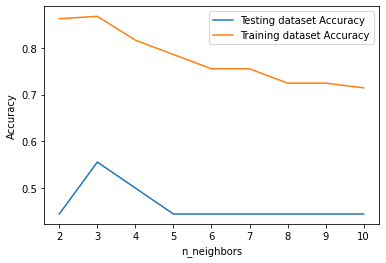

In [30]:
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()




For Training set: Highest accuracy is 0.87 at k=3
For test set: Highest accuracy is 0.58 at k=3
Difference between accuracy of train and test is least is at k=3

In [32]:
from sklearn import metrics
knn3 = KNeighborsClassifier(n_neighbors=3,p=1)
knn_model.fit(x_train,y_train)
knn_predict = knn_model.predict(x_test)
print(knn_predict)
#print(y_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,knn_predict))

confusion_matrix = metrics.confusion_matrix(y_test,knn_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['1','2','3','5','6','7'])

[1 1 1 2 1 1 3 3 1 5 2 5 2 2 7 7 7 7]
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.25      0.33      0.29         3
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         3
           7       0.75      1.00      0.86         3

    accuracy                           0.61        18
   macro avg       0.58      0.61      0.57        18
weighted avg       0.58      0.61      0.57        18



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

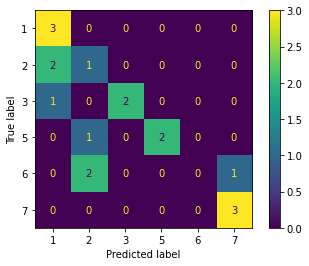

In [24]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()



*   Knn models with both Euclidean nad Manhattan have same accuracy


